# Exploratory Data Analysis
## Alex Brakas

We will explore the dataset of ad_10000records.csv which contains data about the click through rate of ads from Kaggle

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Inspection

In [2]:
file_path = 'data/ad_10000records.csv'
df = pd.read_csv(file_path)

print("--- Data Info ---")
df.info()

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  float64
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Ad Topic Line             10000 non-null  object 
 5   City                      10000 non-null  object 
 6   Gender                    10000 non-null  object 
 7   Country                   10000 non-null  object 
 8   Timestamp                 10000 non-null  object 
 9   Clicked on Ad             10000 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 781.4+ KB


All the values are the correct data type

In [3]:
print("\n--- Descriptive Statistics for Numerical Columns ---")
df.describe()


--- Descriptive Statistics for Numerical Columns ---


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,61.660757,35.940100,53840.047721,177.759831,0.491700
std,15.704142,8.572973,13343.708718,40.820951,0.499956
min,32.600000,19.000000,13996.500000,105.220000,0.000000
25%,48.860000,29.000000,44052.302500,140.150000,0.000000
50%,59.590000,35.000000,56180.930000,178.920000,0.000000
75%,76.580000,42.000000,61840.260000,212.670000,1.000000
max,90.970000,60.000000,79332.330000,269.960000,1.000000


In [4]:
print("\n--- Checking for Missing Values ---")
df.isnull().sum()


--- Checking for Missing Values ---


Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

There are no null values that we need to clean

In [5]:
print("\n--- Target Variable Distribution ---")
df['Clicked on Ad'].value_counts()


--- Target Variable Distribution ---


Clicked on Ad
0    5083
1    4917
Name: count, dtype: int64

The split between the ads clicked and the ones not clicked are almost even which is a great dataset to train our model.

In [6]:
print(f"\n--- Top 10 Countries --- ")
df['Country'].value_counts().head(10)



--- Top 10 Countries --- 


Country
Australia         388
Czech Republic    330
Turkey            312
Qatar             224
Hong Kong         221
Bangladesh        190
Burundi           176
Algeria           174
Vanuatu           162
Bolivia           162
Name: count, dtype: int64

In [7]:
print(f"\n--- Gender Distribution ---")
df['Gender'].value_counts()


--- Gender Distribution ---


Gender
Female    5376
Male      4624
Name: count, dtype: int64

### Graphs

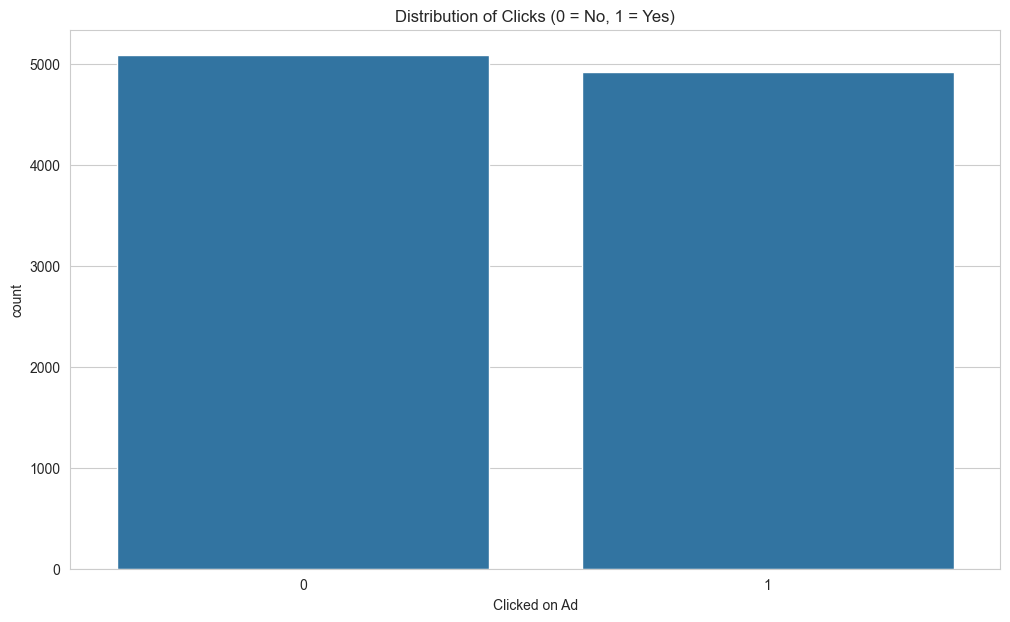

In [8]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 7)

sns.countplot(x='Clicked on Ad', data=df)
plt.title('Distribution of Clicks (0 = No, 1 = Yes)')
plt.show()

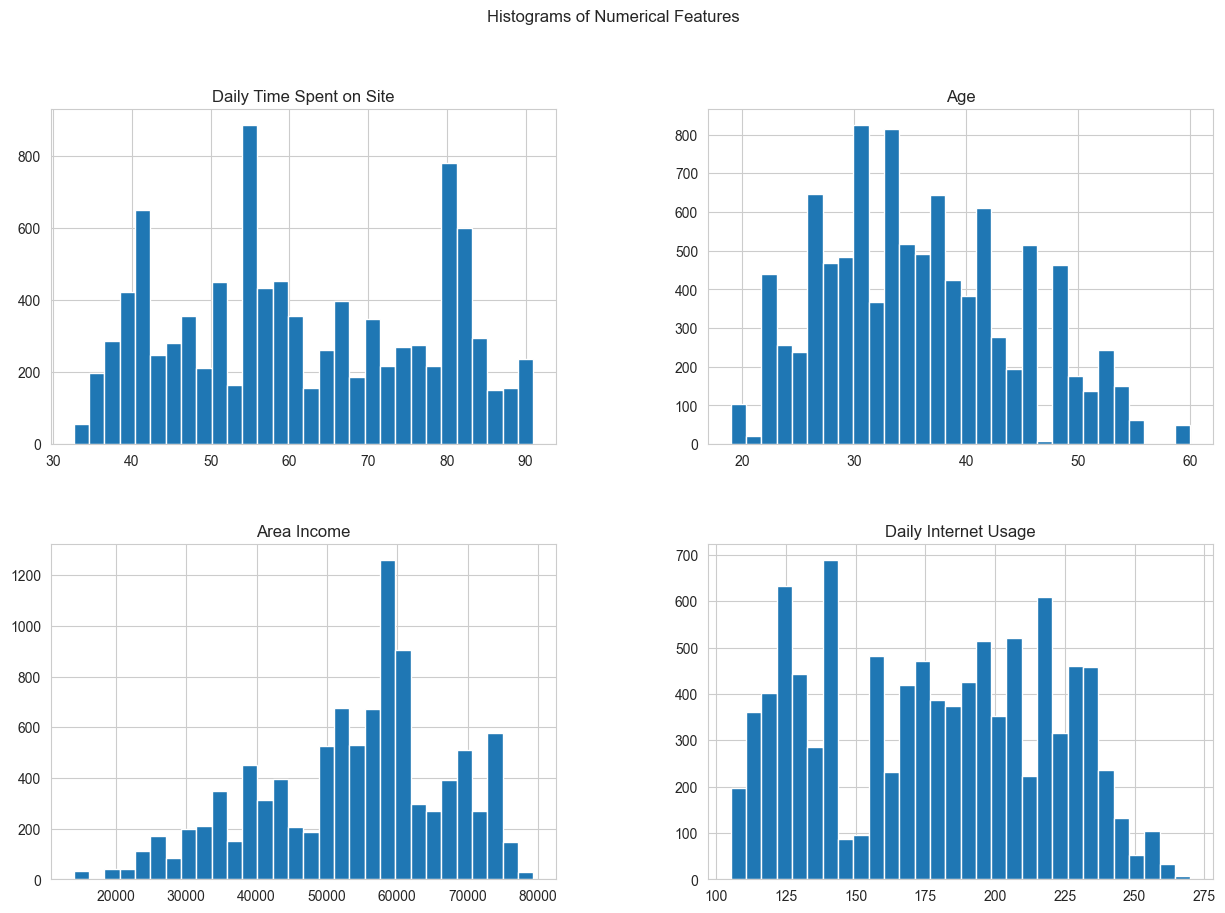

In [9]:
numerical_features = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']
df[numerical_features].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

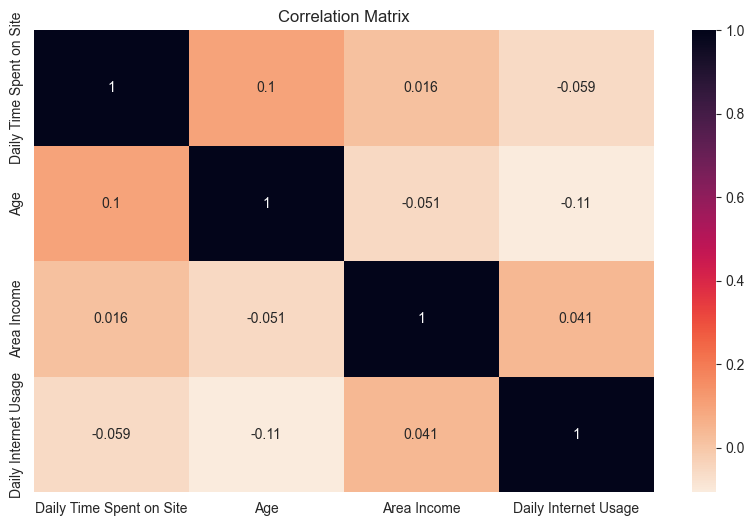

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='rocket_r')
plt.title('Correlation Matrix')
plt.show()

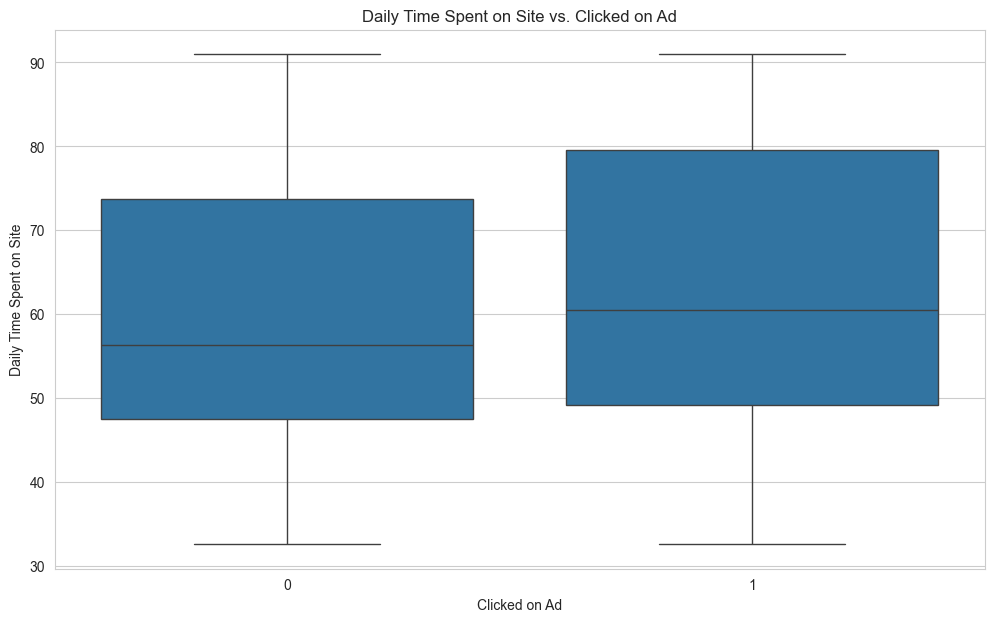

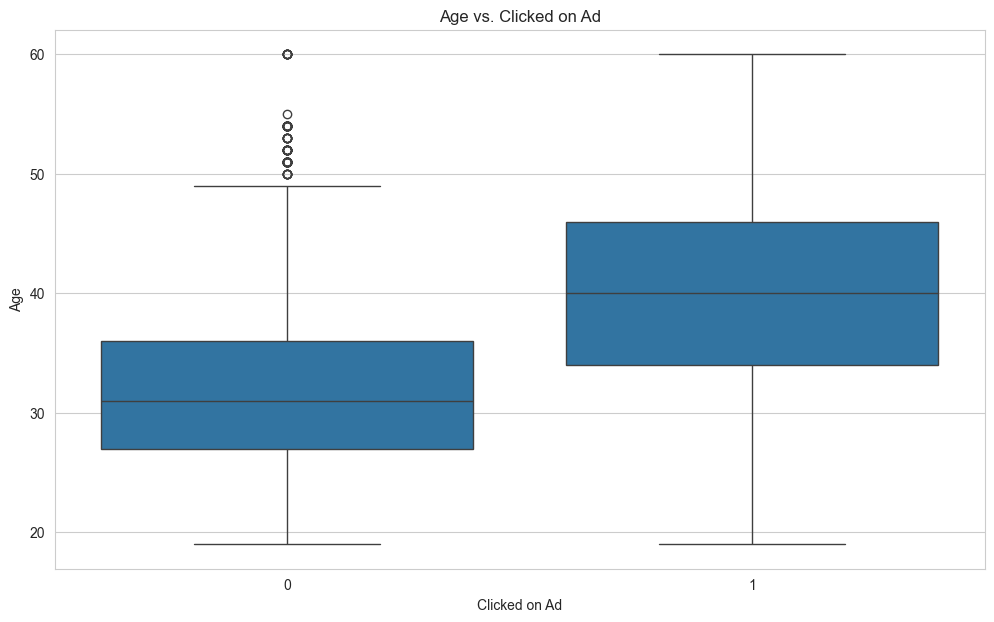

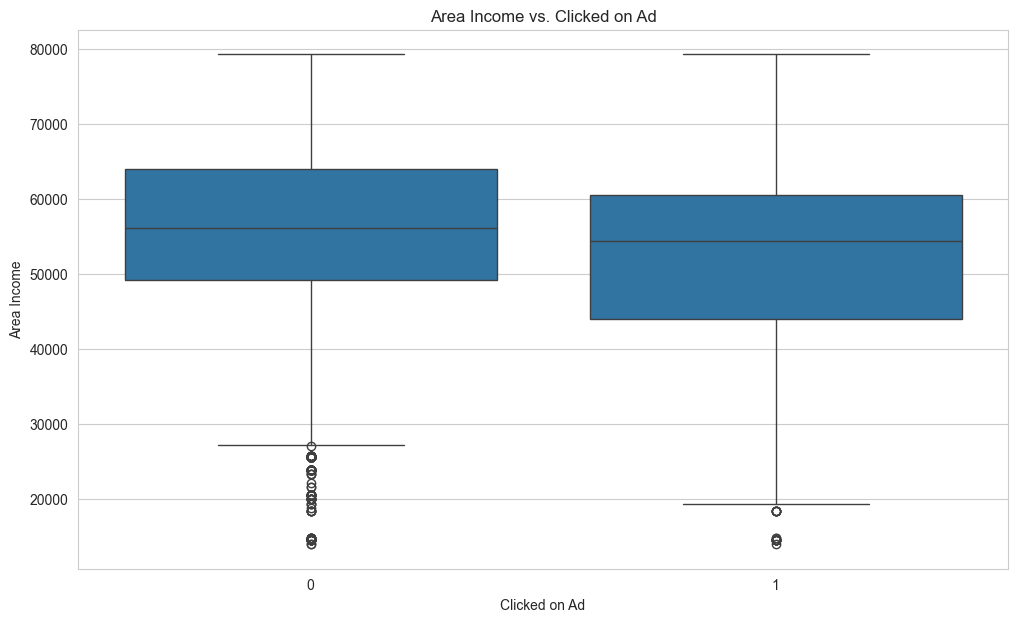

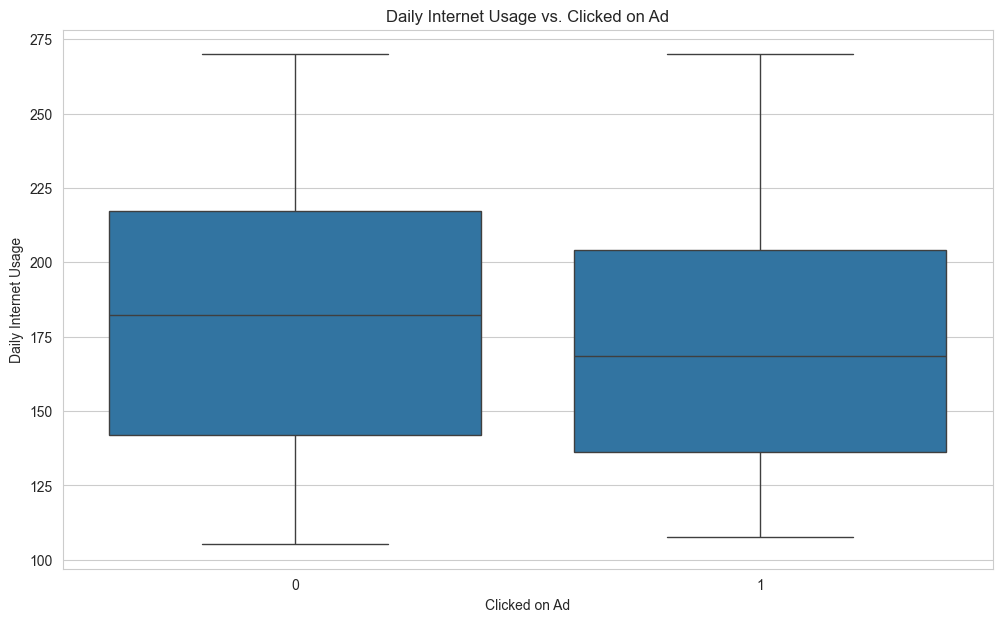

In [11]:
for feature in numerical_features:
    sns.boxplot(x='Clicked on Ad', y=feature, data=df)
    plt.title(f'{feature} vs. Clicked on Ad')
    plt.show()

This shows multiple trends that are important:
- more time spent on the site the more likely they are to click an Ad
- older people are more likely to click through an Ad than someone younger
- lower income individuals are more likely to click on an Ad
- lower internet usage clicks on Ads more

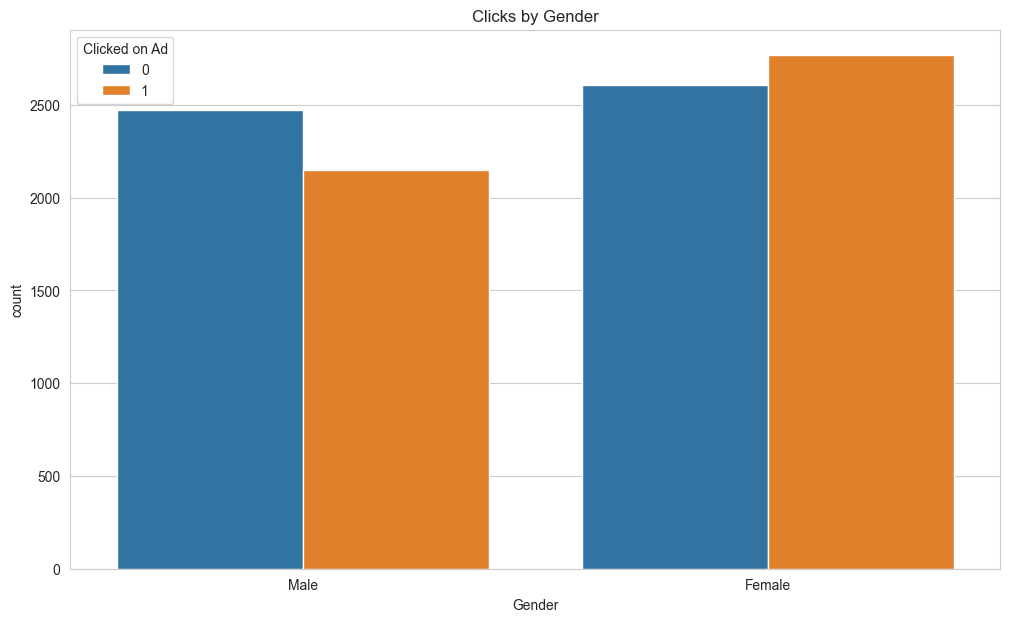

In [12]:
categorical_features = ['Ad Topic Line', 'City', 'Country', 'Gender']

# Plotting clicks by Gender
sns.countplot(x='Gender', hue='Clicked on Ad', data=df)
plt.title('Clicks by Gender')
plt.show()

The difference between Men and Women clicking on Ads are both close to 50/50 but showing females leaning towards a high click through rate, there may be external factors to consider in this analysis

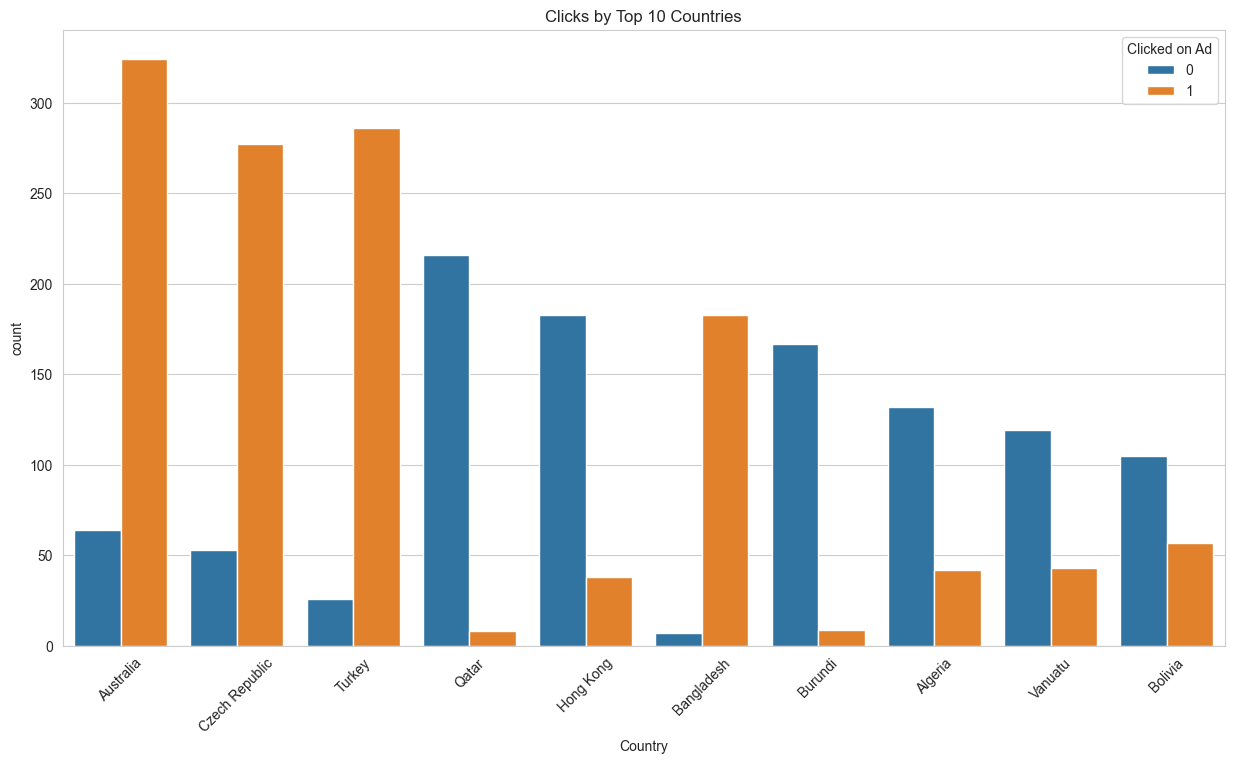

In [13]:
top_10_countries = df['Country'].value_counts().head(10).index
df_top_countries = df[df['Country'].isin(top_10_countries)]

plt.figure(figsize=(15, 8))
sns.countplot(x='Country', hue='Clicked on Ad', data=df_top_countries, order=top_10_countries)
plt.title('Clicks by Top 10 Countries')
plt.xticks(rotation=45)
plt.show()

The country seperation have a common pattern of being massively either click through or not clicking. Australia, Czech Republic, Turkey, and Bangladesh all are exremely more likely to click through the Ad over the other 6 countries within the data. This should be explored much more the see if this is an overall pattern across all countries.

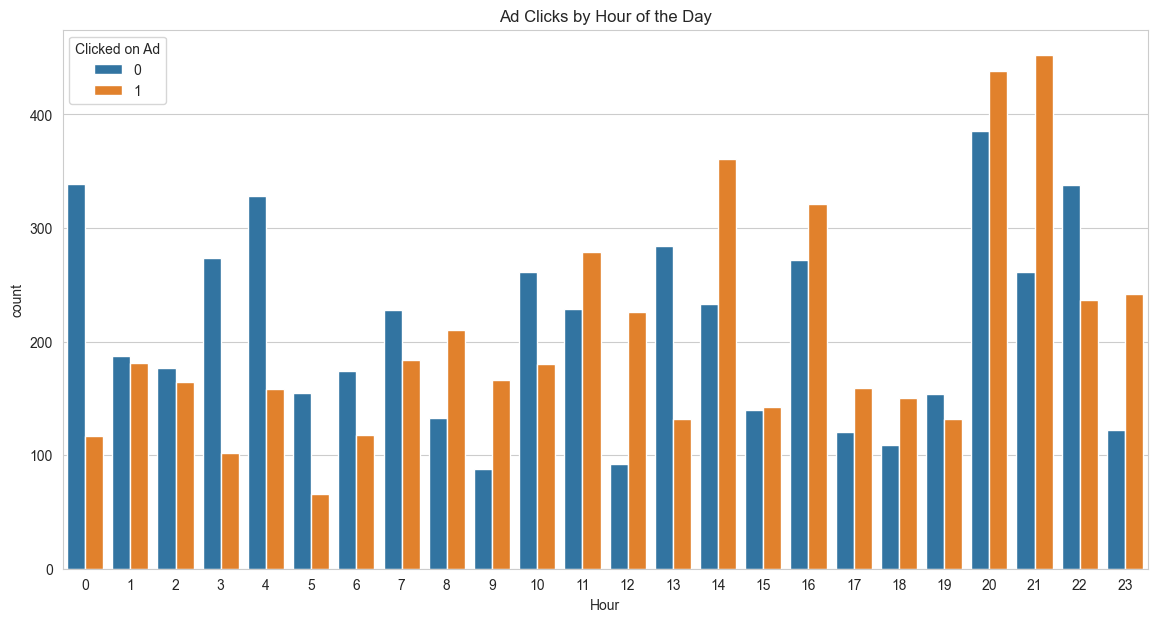

In [14]:
# Convert 'Timestamp' to datetime objects
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Engineer new features from the timestamp
df['Hour'] = df['Timestamp'].dt.hour
df['Month'] = df['Timestamp'].dt.month
df['DayOfWeek'] = df['Timestamp'].dt.day_name()

# Clicks by Hour
plt.figure(figsize=(14, 7))
sns.countplot(x='Hour', hue='Clicked on Ad', data=df)
plt.title('Ad Clicks by Hour of the Day')
plt.show()

This graph shows us that later in the day people are more likely to click on an Ad later into the day rather than in the morning, this can be feature to utilize

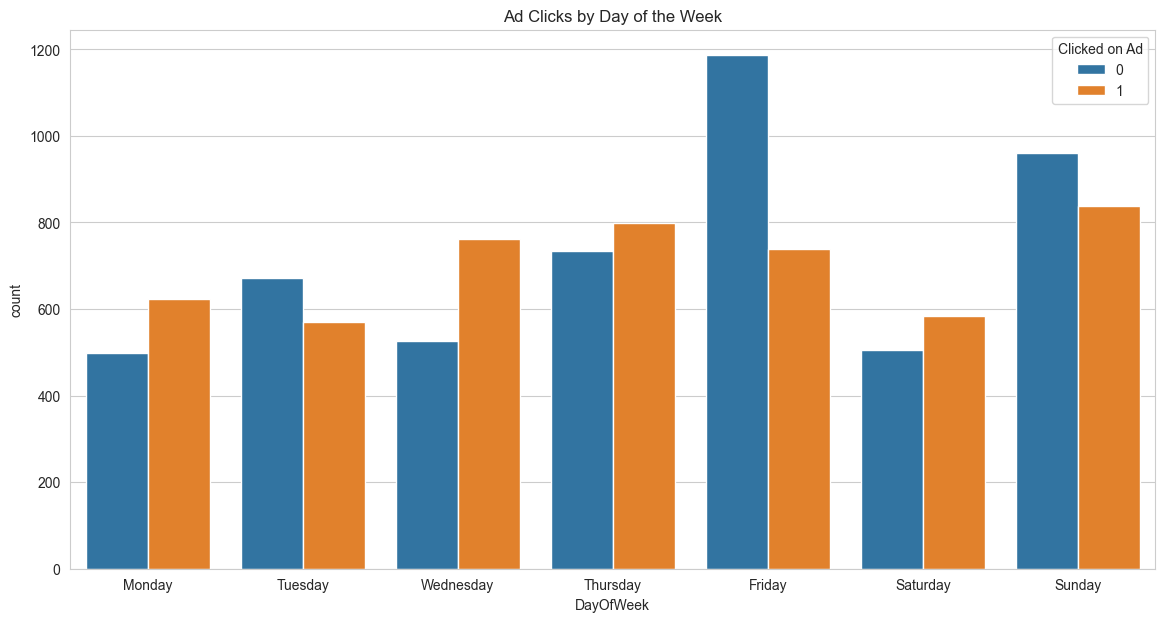

In [15]:
plt.figure(figsize=(14, 7))
sns.countplot(x='DayOfWeek', hue='Clicked on Ad', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Ad Clicks by Day of the Week')
plt.show()

### Conclusion
- There are clear days that are favored to have higher ad click rate
- The data shows certain countries are higher click through rate
- Click through rate increases as the day goes on
- Women are higher to click on an ad than men